# Introduccion al machine Learning
## Actividad 4
### Lorenzo Tomas Diez

### 1 - Setup
- Cargar la base de datos
- Transformacion a dataframe

In [89]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

- Descripción general de las columnas y dimensiones del DataFrame:

In [90]:
print(f"Dimensiones del DataFrame: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")

Dimensiones del DataFrame: (150, 4)
Columnas: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 2 - Graficar las relaciones
**Visualización inicial de las relaciones entre las características**
- En este paso, buscamos observar cómo se relacionan las diferentes dimensiones del conjunto de datos (largo y ancho del sépalo y del pétalo). Esto nos permite identificar posibles patrones o agrupaciones que puedan ser útiles al momento de realizar clustering.

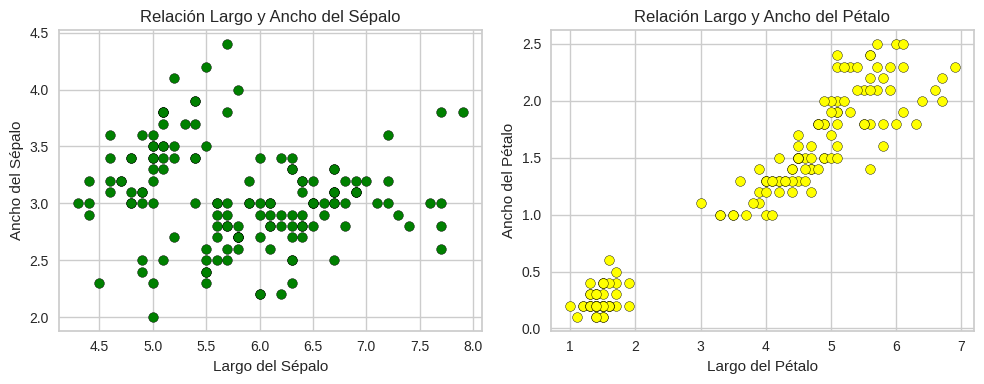

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(
    x=df.iloc[:, 0],
    y=df.iloc[:, 1],
    c='green',
    marker='o',
    edgecolor='black'
)
ax[0].set_title('Relación Largo y Ancho del Sépalo')
ax[0].set_xlabel('Largo del Sépalo')
ax[0].set_ylabel('Ancho del Sépalo')

ax[1].scatter(
    x=df.iloc[:, 2],
    y=df.iloc[:, 3],
    c='yellow',
    marker='o',
    edgecolor='black'
)
ax[1].set_title('Relación Largo y Ancho del Pétalo')
ax[1].set_xlabel('Largo del Pétalo')
ax[1].set_ylabel('Ancho del Pétalo')

plt.tight_layout()
plt.show()

**Normalización de los datos**
- Dado que las variables tienen diferentes escalas (por ejemplo, los valores de largo del pétalo son mayores que los del ancho del pétalo), realizamos un escalado.

In [92]:
from sklearn.preprocessing import scale

df_scaled = scale(df)

import numpy as np
print(f"Media después del escalado: {np.mean(df_scaled, axis=0)}")
print(f"Desviación estándar después del escalado: {np.std(df_scaled, axis=0)}")

Media después del escalado: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Desviación estándar después del escalado: [1. 1. 1. 1.]


**Visualización de las etiquetas originales**
- Para entender cómo están distribuidos los datos en función de las etiquetas originales, graficamos los grupos conocidos.

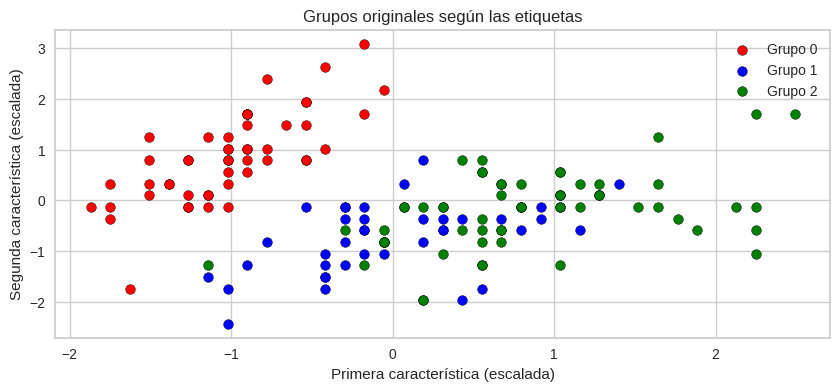

In [93]:
y = iris.target
fig, ax = plt.subplots(figsize=(10, 4))

color = ['red', 'blue', 'green']

for i in np.unique(y):
    ax.scatter(
        x=df_scaled[y == i, 0],
        y=df_scaled[y == i, 1],
        c=color[i],
        marker='o',
        edgecolor='black',
        label=f"Grupo {i}"
    )

ax.set_title("Grupos originales según las etiquetas")
ax.set_xlabel("Primera característica (escalada)")
ax.set_ylabel("Segunda característica (escalada)")
ax.legend()

plt.show()

### 3 , 4 y 5

**Método del Codo**
- Propósito: Determinar el número óptimo de clusters evaluando cómo la inercia (o distorsión) disminuye al aumentar el número de clusters. Esto nos ayuda a encontrar un equilibrio entre la cantidad de clusters y la representatividad de los datos.

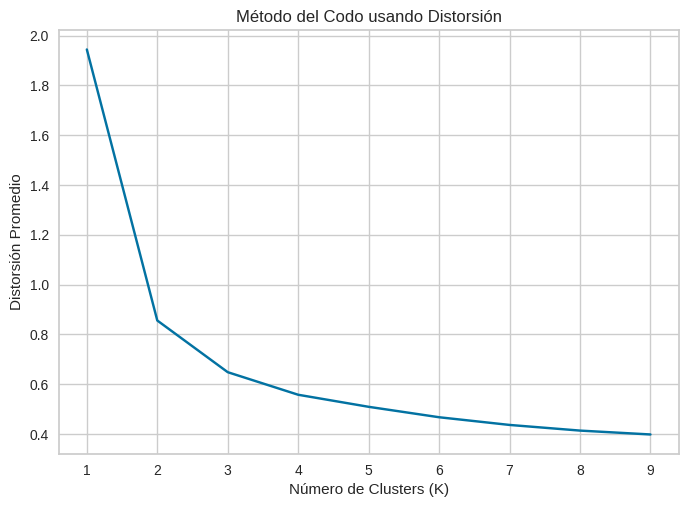

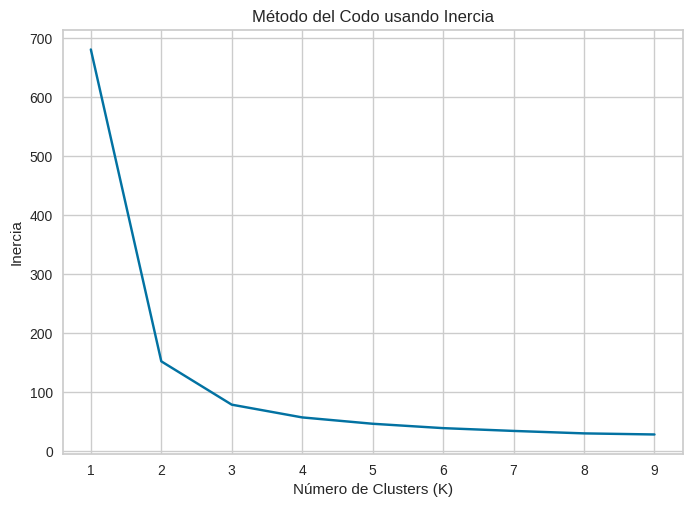

In [94]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

distortions = []
inertias = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42).fit(df)
    distortions.append(
        sum(np.min(cdist(df, kmeanModel.cluster_centers_, "euclidean"), axis=1)) / df.shape[0]
    )
    inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Distorsión Promedio")
plt.title("Método del Codo usando Distorsión")
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo usando Inercia")
plt.show()


Observación: Según ambos gráficos, parece que el número óptimo de clusters está entre 3 y 4. Vamos a evaluar con el método de silhouette.

**Método de Silhouette**
- Propósito: Este método mide la cohesión e independencia de los clusters. Un valor alto de silhouette indica que los puntos dentro de un cluster son similares entre sí y diferentes a los puntos de otros clusters.

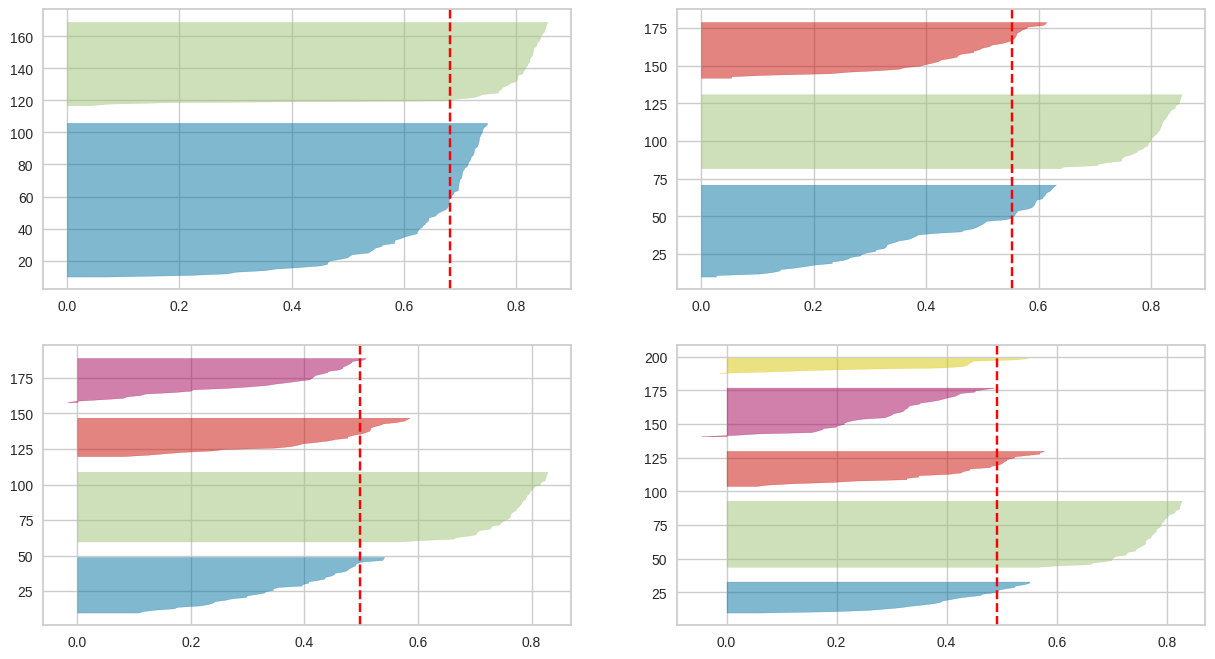

In [95]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for i, n_clusters in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i // 2, i % 2])
    visualizer.fit(df)


Observación: El gráfico muestra que el mejor valor de cohesión se logra con 3 clusters, ya que el valor promedio del coeficiente de silueta (línea roja punteada) es más alto en 3 clusters, indicando una mejor separación entre grupos.

**Graficar los clusters**
En este paso, utilizamos los datos reducidos a dos dimensiones con PCA para visualizar los clusters generados por K-means. Esta gráfica nos permite observar:

- Los clusters: Representados por las regiones coloreadas.
- Los centroides: Marcados con cruces blancas.
- Los datos originales proyectados: Mostrados como puntos negros en el gráfico.

In [96]:
print("Etiquetas numéricas (iris.target):", iris.target)
print("Nombres de las especies (iris.target_names):", iris.target_names)

Etiquetas numéricas (iris.target): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Nombres de las especies (iris.target_names): ['setosa' 'versicolor' 'virginica']


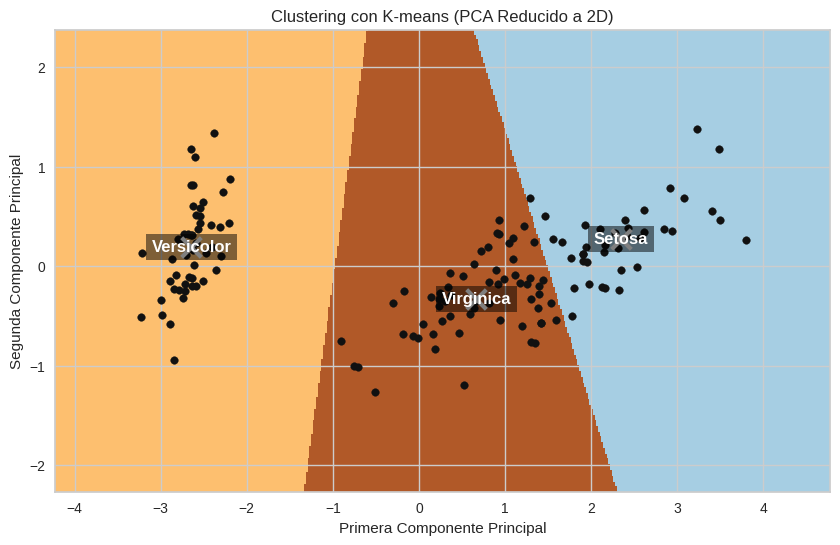

In [97]:
from sklearn.decomposition import PCA

n_clusters = 3
reduced_data = PCA(n_components=2).fit_transform(df)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(reduced_data)

h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect='auto',
    origin='lower'
)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='k', s=30)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='white')


cluster_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

for i, (x, y) in enumerate(centroids):
    plt.text(
        x, y, f"{cluster_names[i]}",
        color='white',
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='center',
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none')
    )

plt.title("Clustering con K-means (PCA Reducido a 2D)")
plt.xlabel("Primera Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.show()



Conclusión: Tanto el método del codo como el método de silhouette y el gráfico PCA respaldan que la mejor elección es 3 clusters. Los centroides de los clusters están marcados con una cruz blanca en la visualización PCA.